### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [261]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [262]:
data = pd.read_csv('data/coupons.csv')

In [263]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

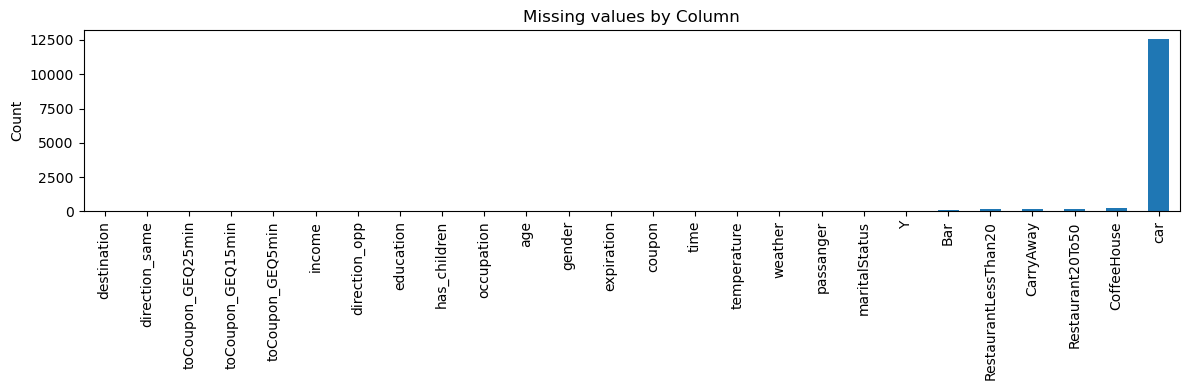

In [264]:
data.info()
data.isnull().sum().sort_values().plot(kind = 'bar', title = 'Missing values by Column', ylabel='Count', figsize=(12, 4))
plt.tight_layout()
plt.savefig('images/missing_plot.png')
plt.show()

3. Decide what to do about your missing data -- drop, replace, other...

In [265]:
# The car column has over 12,000 missing values, 
data = data.drop(columns='car')
# Replace other missing values with 'Unknown' for all Categorical columns, also since all missing values have type as 'object' it should work
data = data.fillna('Unknown')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

4. What proportion of the total observations chose to accept the coupon?



In [266]:
coupon_accepted = data.query('Y == 1').shape[0]/data.shape[0]
print(coupon_accepted)

0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

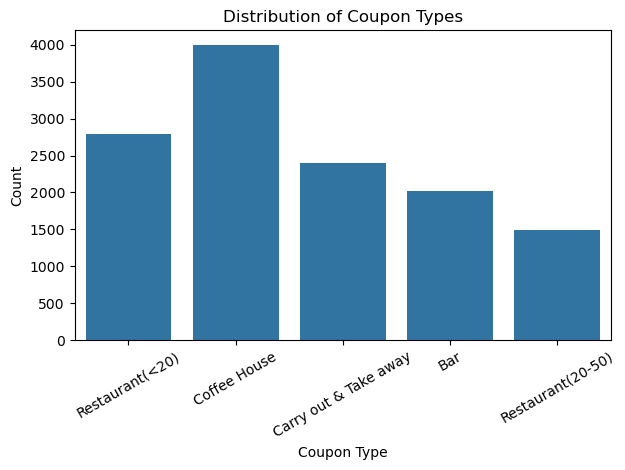

In [267]:
# basic to show all counts
sns.countplot(data=data, x='coupon')
# analyzing which coupons were accepted and which ones were not using hue
# sns.countplot(data=data, x='coupon', hue='Y', palette='pastel6')
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('images/distribution_of_coupon_types.png')
plt.show()

6. Use a histogram to visualize the temperature column.

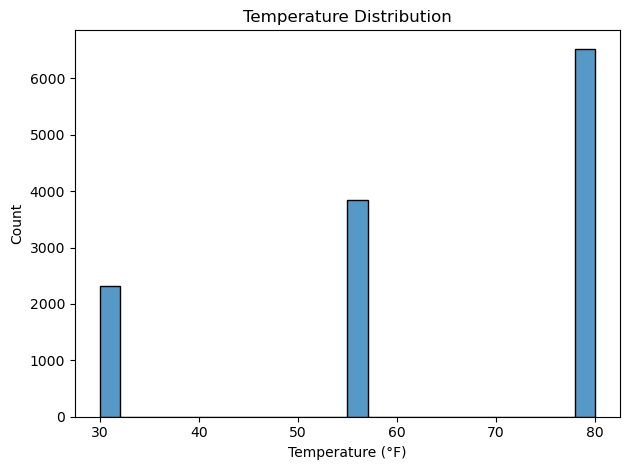

In [268]:
sns.histplot(data=data, x='temperature')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°F)')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('images/distribution_of_temperature.png')
plt.show()

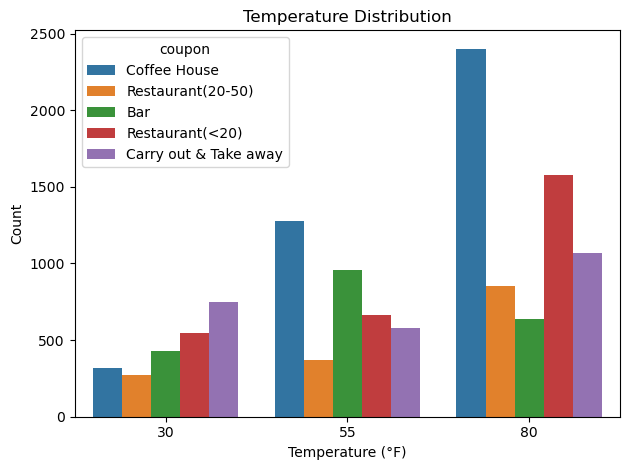

In [271]:
#showing which coupons were given in which temperature

sns.countplot(data=data, x='temperature', hue='coupon')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°F)')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('images/temp_coupon_given.png')
plt.show()

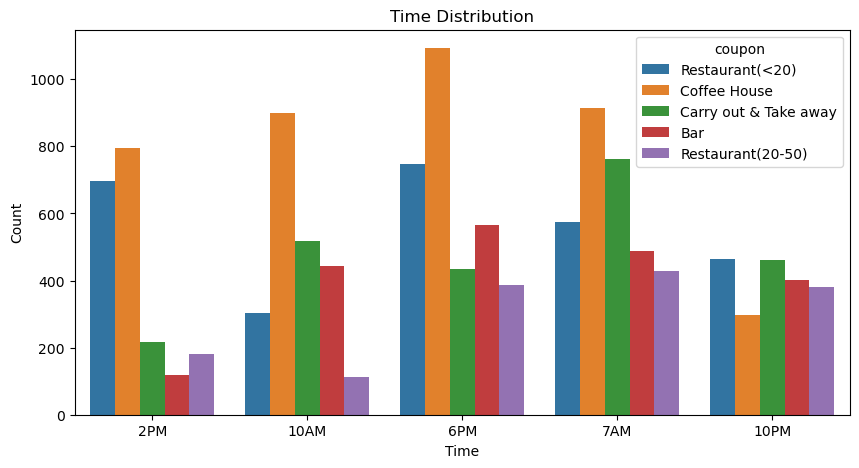

In [272]:
#showing which coupons were given at which time
plt.figure(figsize=(10, 5)) 
sns.countplot(data=data, x='time', hue='coupon')
plt.title('Time Distribution')
plt.xlabel('Time')
plt.ylabel('Count')
plt.savefig('images/time_coupon_given.png')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [273]:
df_bar_coupons = data.query('coupon == "Bar"')
df_bar_coupons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [274]:
bar_coupon_acceptance = df_bar_coupons.query('Y == 1').shape[0]/data.shape[0]
print(bar_coupon_acceptance)


0.065200252286345


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [275]:
bar_lte3 = ['never', 'less1', '1~3']
bar_gt3 = ['4~8', 'gt8']
data['bar_freq'] = data['Bar'].apply(lambda x: '<=3' if x in bar_lte3 else ('>3' if x in bar_gt3 else 'Unknown'))
acceptance_rate = data.groupby('bar_freq')['Y'].mean()
print(acceptance_rate)

bar_freq
<=3        0.562052
>3         0.622456
Unknown    0.514019
Name: Y, dtype: float64


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [276]:
unique_age = data['age'].unique()
print(unique_age)

['21' '46' '26' '31' '41' '50plus' '36' 'below21']


In [277]:
# working with a copy
df_bar_coupons = df_bar_coupons.copy()

df_bar_coupons['age_gt25'] = df_bar_coupons['age'].apply(
    lambda x: 1 if x == '50plus' or (x.isdigit() and int(x) > 25) else 0
)

bar_gt1 = ['1~3', '4~8', 'gt8']
df_bar_coupons['bar_freq_with_age'] = df_bar_coupons.apply(
    lambda row: 'gt1_and_over25' if (row['Bar'] in bar_gt1 and row['age_gt25'] == 1)
                else 'others',
    axis=1
)
acceptance_rate = df_bar_coupons.groupby('bar_freq_with_age')['Y'].mean()
print(acceptance_rate)

bar_freq_with_age
gt1_and_over25    0.695238
others            0.335003
Name: Y, dtype: float64


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [278]:
unique_passanger = data['passanger'].unique()
print(unique_passanger)

['Alone' 'Friend(s)' 'Kid(s)' 'Partner']


In [279]:
#working with a copy
df_bar_coupons = df_bar_coupons.copy()

passanger_not_eligible = ['Alone', 'Kid(s)']
occupations_not_eligible = ['farming', 'fishing', 'forestry']

bar_gt1 = ['1~3', '4~8', 'gt8']
df_bar_coupons['eligible_drivers'] = df_bar_coupons.apply(
    lambda row: 'gt1_passanger_other_occ' if (row['Bar'] in bar_gt1 and row['passanger'] not in passanger_not_eligible and row['occupation'] not in occupations_not_eligible)
                else 'others',
    axis=1
)
acceptance_rate = df_bar_coupons.groupby('eligible_drivers')['Y'].mean()
print(acceptance_rate)

eligible_drivers
gt1_passanger_other_occ    0.717949
others                     0.377058
Name: Y, dtype: float64


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [280]:
unique_rest_under20 = data['RestaurantLessThan20'].unique()
print(unique_rest_under20)
unique_income = data['income'].unique()
print(unique_income)

['4~8' '1~3' 'less1' 'gt8' 'Unknown' 'never']
['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']


In [281]:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed
df_bar_coupons = df_bar_coupons.copy()

passanger_not_eligible = ['Alone', 'Kid(s)']
bar_gt1 = ['1~3', '4~8', 'gt8']

df_bar_coupons['gt1_nokid_notwidowed'] = df_bar_coupons.apply(
    lambda row: 'gt1_nokid_notwidowed' if (row['Bar'] in bar_gt1 and row['passanger'] not in passanger_not_eligible and row['maritalStatus'] != 'Widowed')
                else 'no_gt1_nokid_notwidowed',
    axis=1
)
acceptance_rate_gt1_nokid_notwidowed = df_bar_coupons.groupby('gt1_nokid_notwidowed')['Y'].mean()
print(acceptance_rate_gt1_nokid_notwidowed)

#go to bars more than once a month and are under the age of 30 
df_bar_coupons['age_under30'] = df_bar_coupons['age'].apply(
    lambda x: 1 if x == 'below21' or (x.isdigit() and int(x) < 30) else 0
)

df_bar_coupons['gt1_under30'] = df_bar_coupons.apply(
    lambda row: 'gt1_under30' if (row['Bar'] in bar_gt1 and row['age_under30'] == 1)
                else 'no_gt1_under30',
    axis=1
)
gt1_under30 = df_bar_coupons.groupby('gt1_under30')['Y'].mean()
print(gt1_under30)

# go to cheap restaurants more than 4 times a month and income is less than 50K.

low_income_ranges = [
    'Less than $12500',
    '$12500 - $24999',
    '$25000 - $37499',
    '$37500 - $49999'
]

df_bar_coupons['cheap_rest_gt4_income_gt50k'] = df_bar_coupons.apply(
    lambda row: 'cheap_rest_gt4_income_gt50k' if (row['RestaurantLessThan20'] == '4~8' and row['income'] in low_income_ranges)
                else 'no_cheap_rest_gt4_income_gt50k',
    axis=1
)
cheap_rest_gt4_income_gt50k = df_bar_coupons.groupby('cheap_rest_gt4_income_gt50k')['Y'].mean()
print(cheap_rest_gt4_income_gt50k)

gt1_nokid_notwidowed
gt1_nokid_notwidowed       0.717949
no_gt1_nokid_notwidowed    0.377058
Name: Y, dtype: float64
gt1_under30
gt1_under30       0.721739
no_gt1_under30    0.345694
Name: Y, dtype: float64
cheap_rest_gt4_income_gt50k
cheap_rest_gt4_income_gt50k       0.399194
no_cheap_rest_gt4_income_gt50k    0.411532
Name: Y, dtype: float64


In [282]:
df_bar_coupons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,direction_same,direction_opp,Y,age_gt25,bar_freq_with_age,eligible_drivers,gt1_nokid_notwidowed,age_under30,gt1_under30,cheap_rest_gt4_income_gt50k
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,0,1,0,0,others,others,no_gt1_nokid_notwidowed,1,no_gt1_under30,cheap_rest_gt4_income_gt50k
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,1,0,1,0,others,others,no_gt1_nokid_notwidowed,1,no_gt1_under30,cheap_rest_gt4_income_gt50k
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,0,1,0,0,others,others,no_gt1_nokid_notwidowed,1,no_gt1_under30,cheap_rest_gt4_income_gt50k
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,0,1,1,0,others,others,no_gt1_nokid_notwidowed,1,no_gt1_under30,no_cheap_rest_gt4_income_gt50k
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,1,0,1,0,others,others,no_gt1_nokid_notwidowed,1,no_gt1_under30,no_cheap_rest_gt4_income_gt50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,0,1,0,1,others,others,no_gt1_nokid_notwidowed,1,no_gt1_under30,no_cheap_rest_gt4_income_gt50k
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,0,1,0,1,others,others,no_gt1_nokid_notwidowed,1,no_gt1_under30,no_cheap_rest_gt4_income_gt50k
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,0,1,0,1,others,others,no_gt1_nokid_notwidowed,1,no_gt1_under30,no_cheap_rest_gt4_income_gt50k
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,0,1,0,1,others,others,no_gt1_nokid_notwidowed,1,no_gt1_under30,no_cheap_rest_gt4_income_gt50k


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [283]:
print("Drivers over the age of 25 who visit bars more than once a month and have passangers other than kids are more likely to accept bar coupons than other drivers.")

Drivers over the age of 25 who visit bars more than once a month and have passangers other than kids are more likely to accept bar coupons than other drivers.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

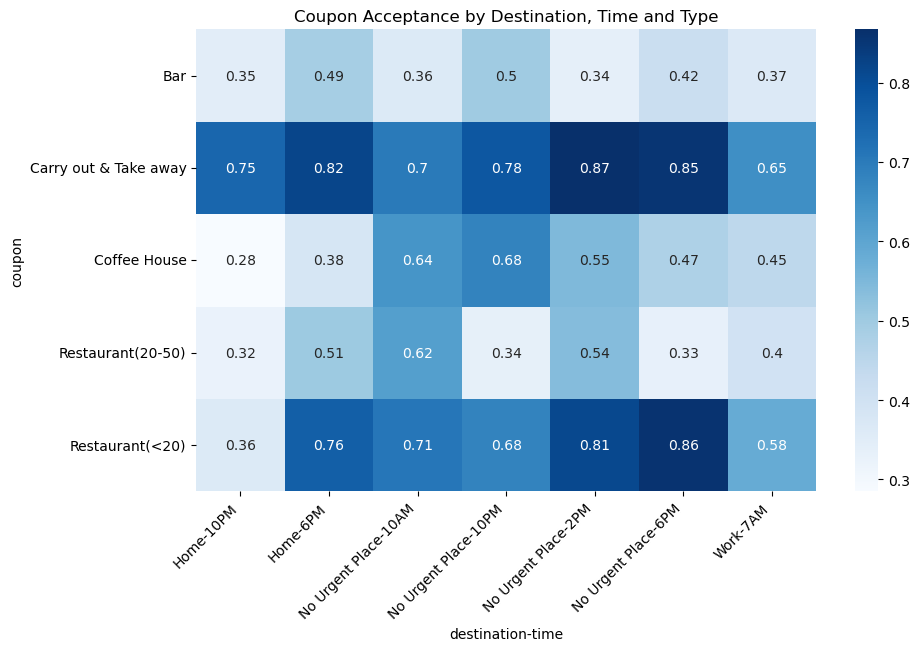

In [284]:
#Analyzing which coupons get accepted by the destination and time combination
pivot = data.pivot_table(index='coupon', columns=['destination', 'time'], values='Y', aggfunc='mean')
plt.figure(figsize=(10, 6))
hm = sns.heatmap(pivot, annot=True, cmap="Blues") 
hm.set_xticklabels(hm.get_xticklabels(), rotation=45, ha='right')
plt.title("Coupon Acceptance by Destination, Time and Type")
plt.savefig('images/coupon_acceptance_by_dest_time.png', bbox_inches='tight')
#Hypothesis - Drivers are more likely to accept coupons when they are not in a hurry (e.g., “No Urgent Place”) and during meal-related times (2PM, 6PM). 
#Among all coupon types, “Carry out & Take away” and “Restaurant(<20)” coupons have the highest acceptance rates in these conditions.

In [285]:
#Analyzing the Coffee House coupons
df_coffee_House = data.query("coupon == 'Coffee House'")
# find acceptance rate depending on the weather
acc_rate_weather = df_coffee_House.groupby('weather')['Y'].mean()
print(acc_rate_weather)



weather
Rainy    0.522124
Snowy    0.432343
Sunny    0.503605
Name: Y, dtype: float64


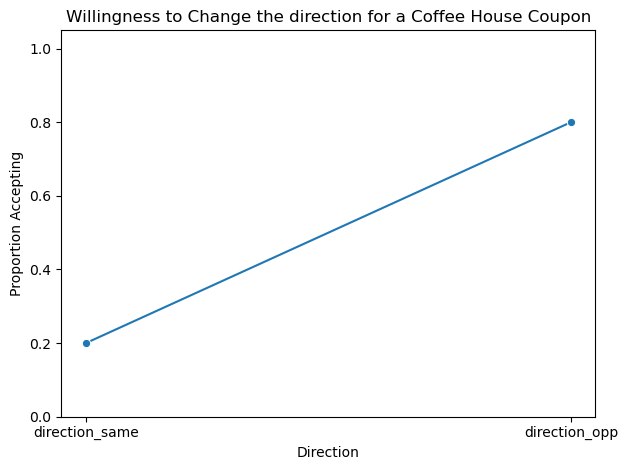

In [286]:
#plot a chart to see how long people can travel with a coupon for a coffee
df_coffee_coupons = df_coffee_House.query("Y == 1")

# Calculate mean (proportion of True = 1) for each travel time column
travel_means = df_coffee_coupons[['direction_same', 'direction_opp']].mean()

# Convert to DataFrame for plotting
travel_means_df = travel_means.reset_index()
travel_means_df.columns = ['Travel Time', 'Proportion']

# Plot line chart
sns.lineplot(data=travel_means_df, x='Travel Time', y='Proportion', marker='o')
plt.title('Willingness to Change the direction for a Coffee House Coupon')
plt.ylabel('Proportion Accepting')
plt.xlabel('Direction')
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()

In [287]:
#Find out the acceptance rate of Restaurant above 20 for people driving with kids to Home at dinner times
df_cheap_rest = data.copy()
df_cheap_rest = df_cheap_rest.query("coupon == 'Restaurant(20-50)'")
df_cheap_rest['cheap_rest_alone'] = df_cheap_rest.apply(
    lambda row: 'cheap_rest_alone_home' if (row['destination'] == 'Home' and row['passanger'] == 'Kid(s' and row['time'] == '6PM')
                else 'others',
    axis=1
)
acc_rate_cheap_rest_alone = df_cheap_rest.groupby('cheap_rest_alone')['Y'].mean()
print(acc_rate_cheap_rest_alone)

cheap_rest_alone
others    0.441019
Name: Y, dtype: float64


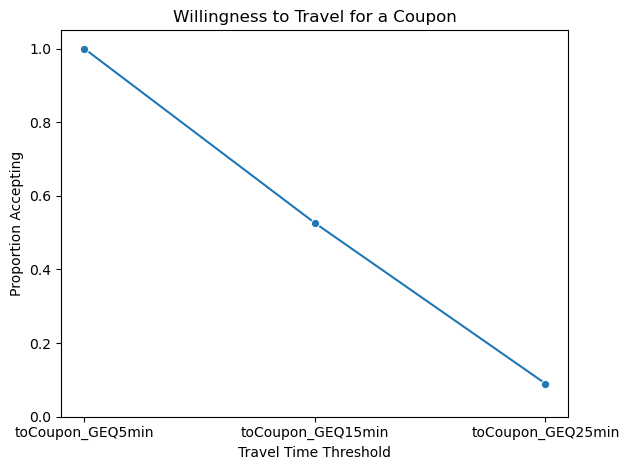

In [288]:
#Find the willingness to travel for all coupons
#plot a chart to see how long people can travel with a coupon
data = data.query("Y == 1")

# Calculate mean (proportion of True = 1) for each travel time column
travel_means = data[['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']].mean()

# Convert to DataFrame for plotting
travel_means_df = travel_means.reset_index()
travel_means_df.columns = ['Travel Time', 'Proportion']

# Plot line chart
sns.lineplot(data=travel_means_df, x='Travel Time', y='Proportion', marker='o')
plt.title('Willingness to Travel for a Coupon')
plt.ylabel('Proportion Accepting')
plt.xlabel('Travel Time Threshold')
plt.ylim(0, 1.05)
plt.tight_layout()
plt.savefig('images/travel_threshold_coupon.png')
plt.show()